## First model

### Set up

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = '../../fastai/courses/dl1/data/birds/'
sz = 224

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [5]:
!ls {PATH}

eagles	penguins  test	train  valid


In [6]:
!ls {PATH}valid

eagles	penguins


In [7]:
!tree {PATH} -d

../../fastai/courses/dl1/data/birds/
├── eagles
├── penguins
├── test
│   ├── eagles
│   └── penguins
├── train
│   ├── eagles
│   └── penguins
└── valid
    ├── eagles
    └── penguins

11 directories


In [9]:
# print number of files in each folder
print('training data: eagles')
!ls -l {PATH}train/eagles | grep ^[^d] | wc -l

print('training data: penguins')
!ls -l {PATH}train/penguins | grep ^[^d] | wc -l

print('validation data: eagles')
!ls -l {PATH}valid/eagles | grep ^[^d] | wc -l

print('validation data: penguins')
!ls -l {PATH}valid/penguins | grep ^[^d] | wc -l

print('test data')
!ls -l {PATH}test | grep ^[^d] | wc -l

training data: eagles
81
training data: penguins
81
validation data: eagles
21
validation data: penguins
21
test data
1


In [10]:
files = !ls {PATH}valid/eagles | head
files

['0.jpg',
 '1.jpg',
 '24.jpg',
 '25.jpg',
 '27.jpg',
 '33.jpg',
 '36.jpg',
 '42.jpg',
 '47.jpg',
 '4.jpg']

In [11]:
files = os.listdir(f'{PATH}valid/penguins')[:5]
files

['82.jpg', '42.jpg', '97.jpg', '58.jpg', '12.jpg']

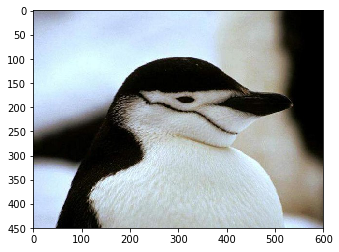

In [13]:
img = plt.imread(f'{PATH}valid/penguins/{files[0]}')
plt.imshow(img);

In [14]:
img.shape

(450, 600, 3)

In [15]:
img[:3,:3]

array([[[143, 148, 167],
        [143, 148, 167],
        [143, 148, 167]],

       [[142, 147, 166],
        [142, 147, 166],
        [142, 147, 166]],

       [[143, 146, 165],
        [144, 147, 166],
        [145, 148, 167]]], dtype=uint8)

In [128]:
!ls {PATH}tmp -lh

total 12K
drwxrwxr-x 4 paperspace paperspace 4.0K Feb 17 07:15 x_act_resnet34_0_224.bc
drwxrwxr-x 4 paperspace paperspace 4.0K Feb 17 07:15 x_act_test_resnet34_0_224.bc
drwxrwxr-x 4 paperspace paperspace 4.0K Feb 17 07:15 x_act_val_resnet34_0_224.bc


In [129]:
#os.listdir(f'{PATH}/models')
!ls {PATH}/models -lh

total 255M
-rw-rw-r-- 1 paperspace paperspace  84M Feb 21 10:17 224_all_1.h5
-rw-rw-r-- 1 paperspace paperspace  84M Feb 19 10:30 224_all.h5
-rw-rw-r-- 1 paperspace paperspace  84M Feb 21 09:14 224_lastlayer_1.h5
-rw-rw-r-- 1 paperspace paperspace 2.1M Feb 19 10:16 224_lastlayer.h5
-rw-rw-r-- 1 paperspace paperspace 2.1M Feb 21 10:46 tmp.h5


In [17]:
#!rm -rf {PATH/tmp}

### Basic model

In [98]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 15)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.721253   0.207086   0.975     
    1      0.457053   0.064153   1.0             
    2      0.318686   0.026668   1.0             
    3      0.236069   0.016193   1.0             
    4      0.185948   0.010866   1.0             
    5      0.151587   0.008321   1.0             
    6      0.126453   0.006858   1.0             
    7      0.107994   0.006738   1.0             
    8      0.093313   0.005864   1.0              
    9      0.088276   0.005453   1.0              
    10     0.077787   0.005564   1.0              
    11     0.080538   0.005241   1.0              
    12     0.072177   0.005185   1.0              
    13     0.065071   0.004888   1.0              
    14     0.059005   0.00479    1.0              



[0.004790111, 1.0]

### Analyze results by looking at pictures

In [20]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [21]:
data.val_y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
data.classes

['eagles', 'penguins']

In [99]:
log_preds = learn.predict()
log_preds.shape

(40, 2)

In [24]:
log_preds[:10]

array([[ -0.     , -14.84888],
       [ -0.00018,  -8.62508],
       [ -0.00003, -10.3201 ],
       [ -0.     , -12.96577],
       [ -0.00123,  -6.70366],
       [ -0.0031 ,  -5.77926],
       [ -0.0001 ,  -9.18817],
       [ -0.00013,  -8.93915],
       [ -0.00089,  -7.02246],
       [ -0.00008,  -9.46692]], dtype=float32)

In [100]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

In [52]:
preds.mean(), probs.mean()

(0.5, 0.49181843)

In [27]:
def rand_by_mask(mask):
    return np.random.choice(np.where(mask)[0], 4, replace=False)

def rand_by_correct(is_correct):
    return rand_by_mask((preds == data.val_y)==is_correct)

In [28]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [29]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

Correctly classified


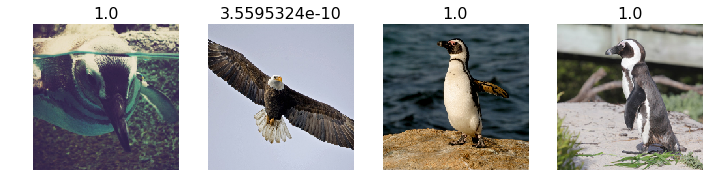

In [53]:
plot_val_with_title(rand_by_correct(True), 'Correctly classified')

In [54]:
plot_val_with_title(rand_by_correct(False), 'Incorrectly classified')

ValueError: a must be non-empty

In [55]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct):
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct eagles


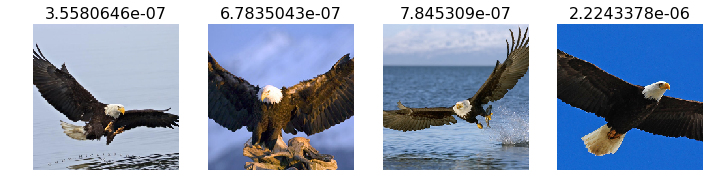

In [34]:
plot_val_with_title(most_by_correct(0, True), 'Most correct eagles')

Most correct penguins


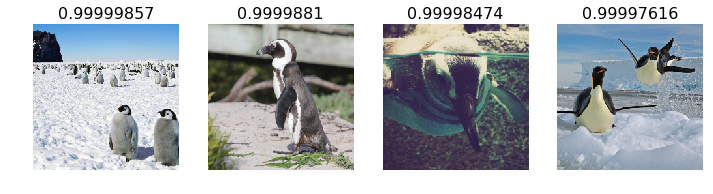

In [35]:
plot_val_with_title(most_by_correct(1, True), 'Most correct penguins')

In [36]:
plot_val_with_title(most_by_correct(0, False), 'Most incorrect eagles')

ValueError: need at least one array to stack

In [37]:
plot_val_with_title(most_by_correct(1, False), 'Most incorrect penguins')

ValueError: need at least one array to stack

Most uncertain predictions


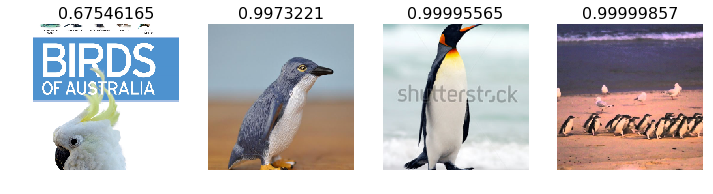

In [56]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, 'Most uncertain predictions')

### Choosing a learning rate

In [42]:
data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 35%|███▌      | 28/80 [00:00<00:00, 155.30it/s, loss=4.69] 


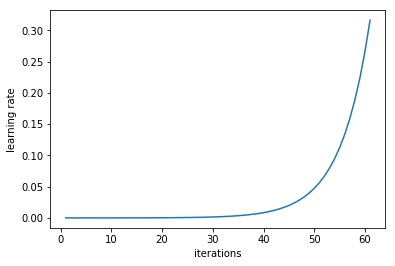

In [43]:
learn.sched.plot_lr()

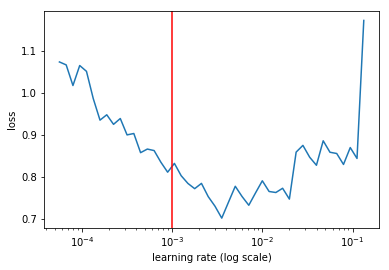

In [45]:
import matplotlib.pyplot as plt
learn.sched.plot()
plt.axvline(x=1e-3, color="red");

## Improving the model

### Data augmentation

In [85]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [86]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [87]:
ims = np.stack([get_augs() for i in range(6)])

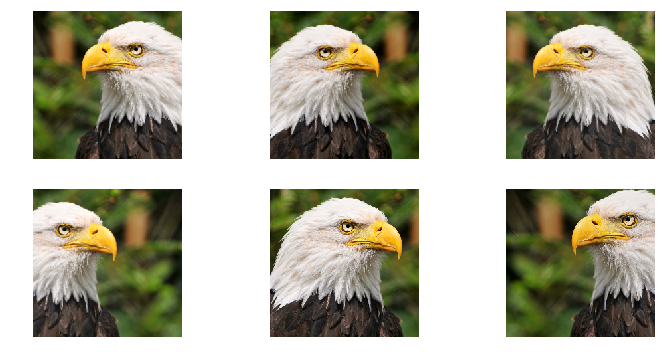

In [88]:
plots(ims, rows=2)

In [89]:
data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [90]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 41%|████▏     | 33/80 [00:00<00:00, 196.48it/s, loss=4.18] 


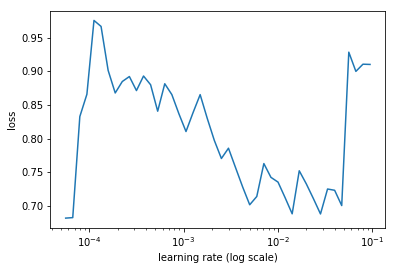

In [91]:
learn.sched.plot()

In [92]:
learn.fit(2e-3, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.720273   0.208567   0.95      



[0.20856667, 0.95]

In [93]:
learn.precompute=False

### learning rate annealing

In [94]:
learn.fit(1e-3, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.571034   0.111798   0.975     
    1      0.725717   0.235307   0.925                     
    2      0.559935   0.171434   0.95                      



[0.17143418, 0.95]

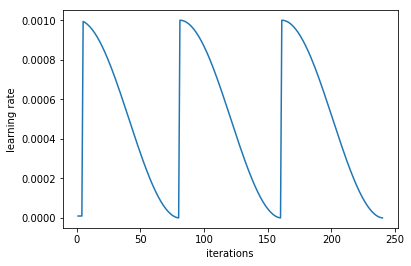

In [70]:
learn.sched.plot_lr()

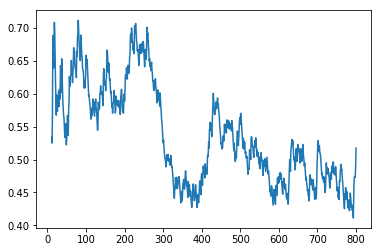

In [78]:
learn.sched.plot_loss()

In [72]:
#learn.save('224_lastlayer_1')

In [73]:
#learn.load('224_lastlayer_1')

### Fine-tuning and differential learning rate annealing

In [95]:
learn.unfreeze()

In [96]:
lr=np.array([1e-5,1e-4,1e-3])

In [97]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.788903   0.915507   0.625     
    1      0.780495   1.320302   0.775                     
    2      0.814489   0.791924   0.525                     
    3      0.833464   0.866885   0.45                      
    4      0.950025   0.611658   0.625                     
    5      0.966958   0.538947   0.725                     
    6      0.784526   0.645492   0.6                       



[0.6454919, 0.6]

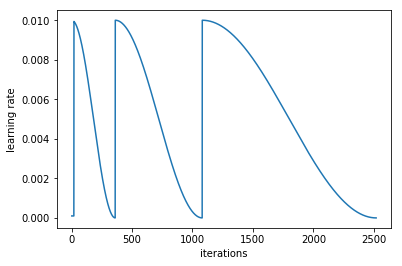

In [91]:
learn.sched.plot_lr()

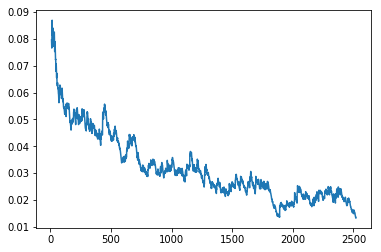

In [93]:
learn.sched.plot_loss()

In [94]:
learn.save('224_all_1')

In [95]:
learn.load('224_all_1')

## Test Time Augmentation

In [115]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

In [116]:
accuracy_np(probs, y)

0.9945

## Analyzing results

### Confution matrix

In [118]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data.val_y, preds)

[[20  0]
 [ 0 20]]


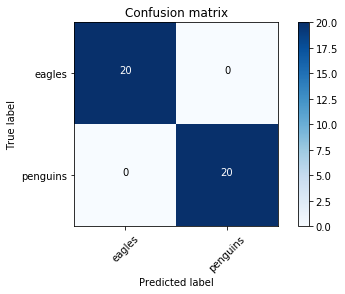

In [103]:
plot_confusion_matrix(cm, data.classes)

#### Looking at pictures again

Most incorrect cats


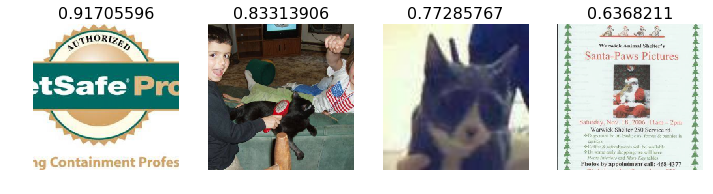

In [121]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


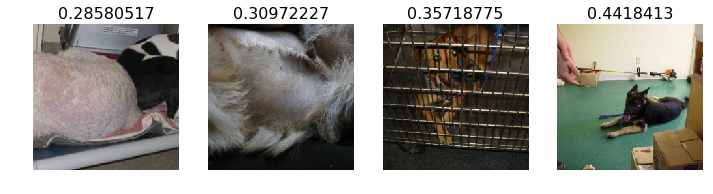

In [122]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


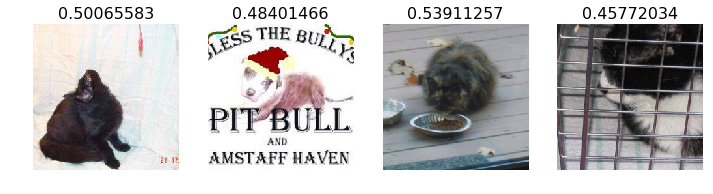

In [123]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, 'Most uncertain predictions')

### Analyzing results: loss and accuracy

In [86]:
def binary_loss(y, p):
    #return np.mean(-(y*np.log(p)+(1-y)*np.log(1-p)))
    loss = 0.0
    for i in range(len(y)):
        if y[i] == 1:
            loss += -np.log(p[i])
        else:
            loss += -np.log(1-p[i])
    return loss / len(y)

In [87]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.98, 0.05, 0.01, 0.95])

binary_loss(acts, preds)

0.03320990798653052